In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.12.03']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
1013,Afghanistan,22.12.03,206145
2038,Africa,22.12.03,12430618
3051,Albania,22.12.03,333391
4064,Algeria,22.12.03,271102
5071,Andorra,22.12.03,47219
...,...,...,...
235943,Wallis and Futuna,22.12.03,3415
236991,World,22.12.03,644922358
237959,Yemen,22.12.03,11945
238950,Zambia,22.12.03,333746


In [3]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
1013,Afghanistan,22.12.03,206145
3051,Albania,22.12.03,333391
4064,Algeria,22.12.03,271102
5071,Andorra,22.12.03,47219
6060,Angola,22.12.03,104676
...,...,...,...
234185,Vietnam,22.12.03,11517517
235943,Wallis and Futuna,22.12.03,3415
237959,Yemen,22.12.03,11945
238950,Zambia,22.12.03,333746


In [4]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
226532,United States,22.12.03,98967906
98731,India,22.12.03,44674616
76066,France,22.12.03,38014872
81103,Germany,22.12.03,36557861
30232,Brazil,22.12.03,35337546
201079,South Korea,22.12.03,27308090
108901,Japan,22.12.03,25153028
106856,Italy,22.12.03,24488080
225485,United Kingdom,22.12.03,24024746
178092,Russia,22.12.03,21304497


In [5]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
219291,Turkey,22.12.03,16919638
203089,Spain,22.12.03,13614807
163206,Oceania,22.12.03,13097515
234185,Vietnam,22.12.03,11517517
13226,Australia,22.12.03,10751318
...,...,...,...
143832,Montserrat,22.12.03,1403
128160,Macao,22.12.03,810
100769,International,22.12.03,721
232144,Vatican,22.12.03,29


In [6]:
df_top.set_index('국가', inplace=True)

In [7]:
df_top.loc['ETC'] = ['22.12.03', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_9736\4011313147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.12.03', df_etc['확진자'].sum()]


In [8]:
df_top

,일자,확진자
국가,,
United States,22.12.03,98967906
India,22.12.03,44674616
France,22.12.03,38014872
Germany,22.12.03,36557861
Brazil,22.12.03,35337546
South Korea,22.12.03,27308090
Japan,22.12.03,25153028
Italy,22.12.03,24488080
United Kingdom,22.12.03,24024746


In [9]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.12.03,98967906
1,India,22.12.03,44674616
2,France,22.12.03,38014872
3,Germany,22.12.03,36557861
4,Brazil,22.12.03,35337546
5,South Korea,22.12.03,27308090
6,Japan,22.12.03,25153028
7,Italy,22.12.03,24488080
8,United Kingdom,22.12.03,24024746
9,Russia,22.12.03,21304497


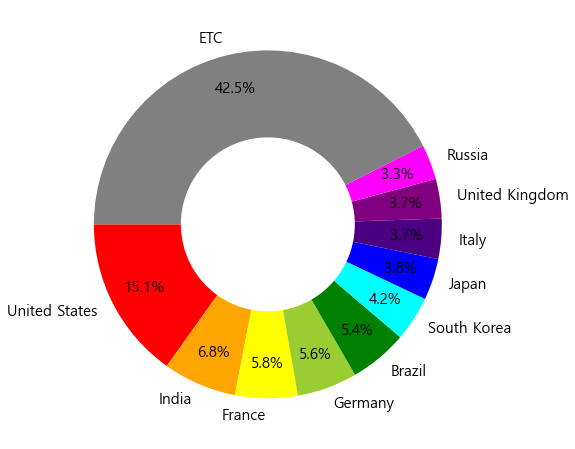

In [10]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()